# Live Code 3
- Muhammad Nafisa Fakhri
- FTDS Batch 013

Kamu adalah seorang data scientist di jasa transportasi. Manajemen meminta bantuanmu untuk mengonfirmasi dugaan yang mereka temukan berkaitan adanya nilai tidak wajar pada biaya layanan ekstra yang dibebankan kepada pelanggan. Bantu tim manajemen memvalidasi hal tersebut.

SQL query code: 
```
SELECT extras
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE extras > 0
LIMIT 1000
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Data Loading dan Data Exploration

In [2]:
data_mentah = pd.read_csv("h8dsft_P0LC3_mnfakhri.csv.csv")
data_mentah.head()

,extras
0,1.0
1,13.0
2,1.5
3,1.5
4,2.0


In [3]:
data_mentah.tail()

,extras
995,3.5
996,3.0
997,6.0
998,3.0
999,7.5


In [4]:
data_mentah.shape

(1000, 1)

In [5]:
data_mentah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   extras  1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


In [6]:
data_extras = data_mentah["extras"]
data_extras

0       1.0
1      13.0
2       1.5
3       1.5
4       2.0
       ... 
995     3.5
996     3.0
997     6.0
998     3.0
999     7.5
Name: extras, Length: 1000, dtype: float64

Berdasarkan hasil eksplorasi data tidak terdapat missing value dalam data tersebut, sehingga tidak diperlukan celaning data dalam kasus ini.

- Perhitungan nilai central of tendency

In [7]:
print("Nilai dari rata-rata data adalah:",data_extras.mean())
print("Nilai dari median data adalah:",data_extras.median())
print("Nilai dari modus data adalah:",data_extras.mode()[0])
print("Nilai dari standar deviasi data adalah:",data_extras.std())
print("Nilai dari variansi data adalah:",data_extras.var())
print("Nilai dari range data adalah:",data_extras.max() - data_extras.min())

Nilai dari rata-rata data adalah: 5.5555
Nilai dari median data adalah: 2.5
Nilai dari modus data adalah: 1.0
Nilai dari standar deviasi data adalah: 7.899814986873238
Nilai dari variansi data adalah: 62.40707682682702
Nilai dari range data adalah: 99.0


- Nilai dari rata-rata data adalah 5.5555
- Nilai dari median data adalah 2.5
- Nilai dari modus data adalah 1.0
- Nilai dari standar deviasi data adalah 7.899814986873238
- Nilai dari variansi data adalah 62.40707682682702
- Nilai dari range data adalah 99.0

Berdasarkan hasil perhitungan central of tendency diperoleh bahwa nilai rata-rata, median, modus memiliki nilai berbeda. Hal ini menunjukan bahwa data tersebut memiliki karakteristik persebaran nilai data yang bervariasi dan tidak terpusat. Hal ini bisa dilihat juga dari nilai dari standar deviasi yang lebih tinggi dari rata-rata.

- Mari kita lihat skewness dan kurtosis dari data tersebut.

Nilai dari Skewness data adalah: 4.767407981483202
Nilai dari Kurtosis data adalah: 42.2692454179528


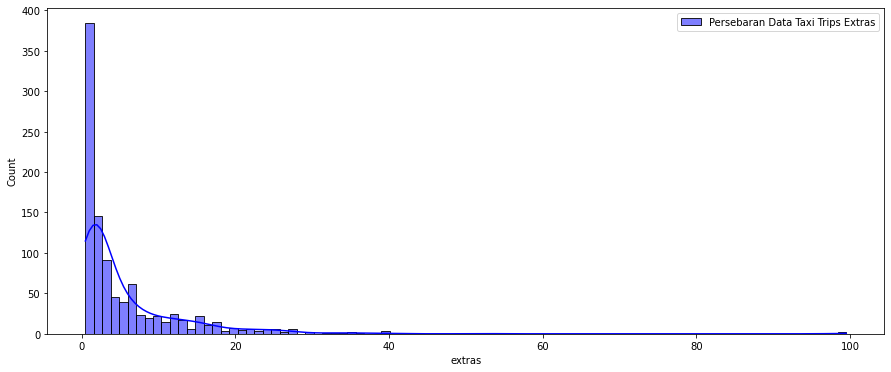

In [8]:
print("Nilai dari Skewness data adalah:",data_extras.skew())
print("Nilai dari Kurtosis data adalah:",data_extras.kurt())
plt.figure(figsize=(15,6))
sns.histplot(data_extras,kde=True,label="Persebaran Data Taxi Trips Extras",color="blue")
plt.legend()

- Berdasarkan perhitungan diatas diperoleh nilai dari skewness sebesar 4.767407981483202 yang mengartikan bahwa data tersebut berjenis right skew karena bernilai positif dan nilai kurtosis sebesar 42.2692454179528 yang memiliki arti memiliki keruncingan grafik yang sangat runcing.

- Bersadarkan dari nilai skewness dan kurtosis dan melihat dari bentuk grafik, data tersebut tidak berdistribusi normal dikarenakan bentuk grafik data tersebut tidak menyerupai lonceng dalam artian bahwa persebaran data tersebut tidak terpusat di tengah.

- Berdasarkan dari nilai skewness, mean, mediaan dan modus serta melihat dari grafik persebaran data diperoleh informasi bahwa data tersebut tidak berdistribusi normal. Maka perhitungan extreme value analysis disini menggunakan metode EVA untuk data skew atau tidak berdistribusi normal.

<AxesSubplot:title={'center':'Box plot Data Extras'}>

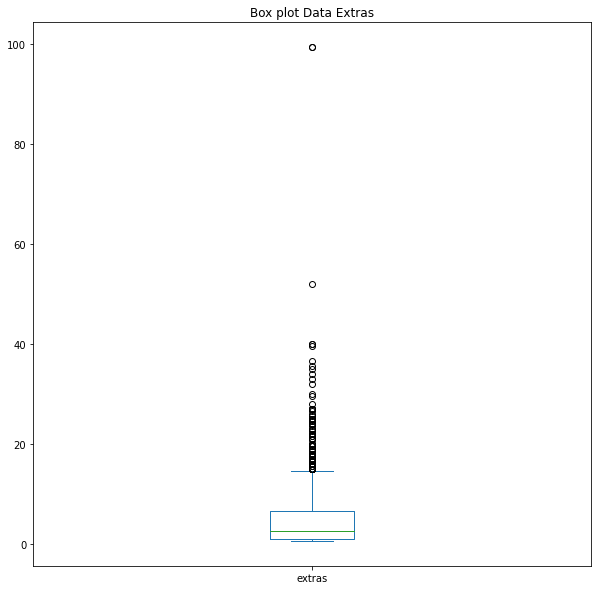

In [9]:
plt.figure(figsize=(10,10))
data_extras.plot(kind="box",title="Box plot Data Extras")

Berdasarkan hasil grafik boxplot diperoleh informasi bahwa terdapat data yang berada diluar batas (data outlier). Maka dari itu diperlukan pembersihan data yang diluar outlier agar data tersebut bisa olah lebih lanjut.

In [10]:
data_bersih = []

In [11]:
data_bersih = data_mentah["extras"]

In [12]:
iqr_data = data_bersih.quantile([0.75])[0.75] - data_bersih.quantile([0.25])[0.25]
batas_atas = data_bersih.quantile([0.75])[0.75] + 1.5*iqr_data
batas_bawah = data_bersih.quantile([0.25])[0.25] - 1.5*iqr_data
for a in range(0,len(data_bersih)):
    if data_bersih[a] > batas_atas or data_bersih[a] < batas_bawah:
        del data_bersih[a]
    else:
        continue
data_bersih.reset_index(drop=True,inplace=True)

In [13]:
data_bersih

0       1.0
1      13.0
2       1.5
3       1.5
4       2.0
       ... 
889     3.5
890     3.0
891     6.0
892     3.0
893     7.5
Name: extras, Length: 894, dtype: float64

In [14]:
print("Nilai dari rata-rata data adalah:",data_bersih.mean())
print("Nilai dari median data adalah:",data_bersih.median())
print("Nilai dari modus data adalah:",data_bersih.mode()[0])
print("Nilai dari standar deviasi data adalah:",data_bersih.std())
print("Nilai dari variansi data adalah:",data_bersih.var())
print("Nilai dari range data adalah:",data_bersih.max() - data_bersih.min())

Nilai dari rata-rata data adalah: 3.5039149888143175
Nilai dari median data adalah: 2.0
Nilai dari modus data adalah: 1.0
Nilai dari standar deviasi data adalah: 3.3329157386397616
Nilai dari variansi data adalah: 11.108327320872629
Nilai dari range data adalah: 14.0


- Terdapat penurunan jumlah data dari 1000 data menjadi 894 data sebesar 10.6 %. Hal ini tidak terlalu signifikan karena nilai persentase penurunan jumlah data masih dibawah 50%.
- Terdapat penurunan nilai central of tendency dari data yang setelah dihilangkan outlier seperti nilai rata-rata, median, standar deviasi, variansi dan range. Tetapi untuk nilai modus tidak berubah.

Setelah melakukan penghapusan data outlier, kita perlu menguji apakah nilai rata-rata sebelum dihilangkan outlier sama dengan setelah dihilangkan outlier. Hipotesis nya adalah bahwa nilai rata-rata sebelum dan sesudah penghapusan outlier adalah sama, sedangkan saya percaya bahwa nilai rata-rata sebelum dan sesudah peghapusan outlier berbeda.

Hipotesis kita dalam kasus ini dinotasikan sebagai berikut:

**H0: μ sebelum = μ sesudah**

**H1: μ sebelum != μ sesudah**

In [19]:
data_mentah2 = pd.read_csv("h8dsft_P0LC3_mnfakhri.csv.csv")
data_mentah2

,extras
0,1.0
1,13.0
2,1.5
3,1.5
4,2.0
...,...
995,3.5
996,3.0
997,6.0
998,3.0


In [20]:
data_mentah2["extras"]

0       1.0
1      13.0
2       1.5
3       1.5
4       2.0
       ... 
995     3.5
996     3.0
997     6.0
998     3.0
999     7.5
Name: extras, Length: 1000, dtype: float64

In [22]:
rata2_sebelum = data_mentah2["extras"].mean()
std_sebelum = data_mentah2["extras"].std()
rata2_setelah = data_bersih.mean()
std_setelah = data_bersih.std()
alfa = 0.05
t_hitung,nilai_p = stats.ttest_ind(data_mentah2["extras"],data_bersih)
print("Nilia dari rata-rata sebelum adalah:",rata2_sebelum)
print("Nilai dari standar deviasi sebelum adalah:",std_sebelum)
print("Nilai dari rata-rata setelah adalah:",rata2_setelah)
print("Nilai dari standar deviasi setelah adalah:",std_setelah)
print("Nilai alfa yang digunakan adalah:",alfa)
print("Nilai dari P adalah:",nilai_p)
print("Nilai dari t hitung adalah:",t_hitung)

Nilia dari rata-rata sebelum adalah: 5.5555
Nilai dari standar deviasi sebelum adalah: 7.899814986873238
Nilai dari rata-rata setelah adalah: 3.5039149888143175
Nilai dari standar deviasi setelah adalah: 3.3329157386397616
Nilai alfa yang digunakan adalah: 0.05
Nilai dari P adalah: 7.928143675859847e-13
Nilai dari t hitung adalah: 7.212181321920962


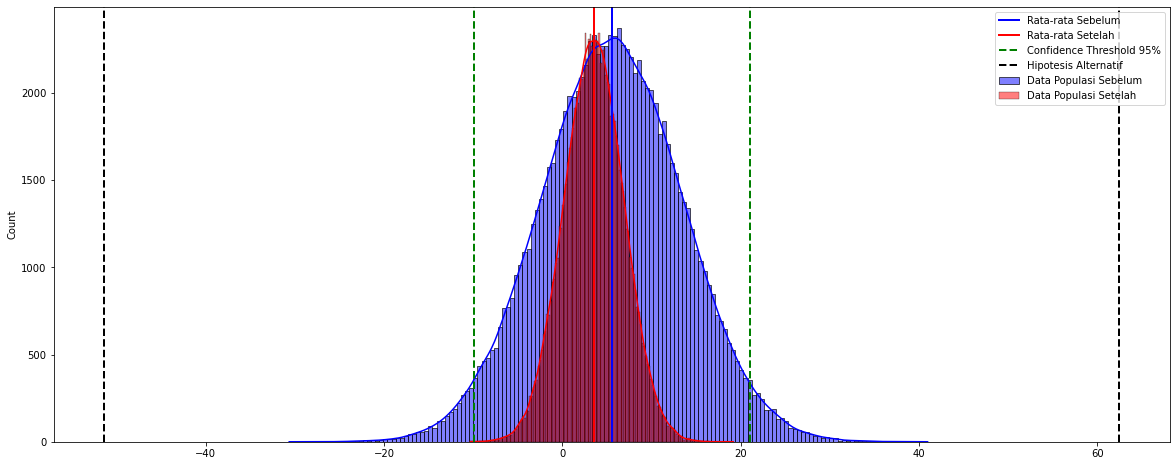

In [23]:
data_sebelum_pop = np.random.normal(rata2_sebelum,std_sebelum,100000)
data_setelah_pop = np.random.normal(rata2_setelah,std_setelah,100000)
rata2_sebelum_pop = data_sebelum_pop.mean()
std_sebelum_pop = data_sebelum_pop.std()
nilai_ci = stats.norm.interval(0.95,rata2_sebelum,std_sebelum)

plt.figure(figsize=(20,8))
sns.histplot(data_sebelum_pop,kde=True,label="Data Populasi Sebelum",color="blue")
sns.histplot(data_setelah_pop,kde=True,label="Data Populasi Setelah",color="red")
plt.axvline(rata2_sebelum,color="blue",linewidth=2,label="Rata-rata Sebelum")
plt.axvline(rata2_setelah,color="red",linewidth=2,label="Rata-rata Setelah")
plt.axvline(nilai_ci[1],color="green",linestyle="dashed",linewidth=2,label="Confidence Threshold 95%")
plt.axvline(nilai_ci[0],color="green",linestyle="dashed",linewidth=2)
plt.axvline(rata2_sebelum_pop+t_hitung*std_sebelum_pop,color="black",linestyle="dashed",linewidth=2,label="Hipotesis Alternatif")
plt.axvline(rata2_sebelum_pop-t_hitung*std_sebelum_pop,color="black",linestyle="dashed",linewidth=2)
plt.legend()
plt.show()

Berdasarkan Hasil perhitungan tersebut Diperoleh hasil sebagai berikut : 
- Nilai P value dibahwa nilai alfa, hal ini menunjukan bahwa hipotesis awal (H0) ditolak
- Dilihat dari grafik bahwa letak garis hitam (H1) berada diluar area garis hijau (H0), hal ini menunjukan bahwa hipotesis awal (H0) ditolak
- Terdapat perbedaan signifikan antara data sebelum dihapus outlier dengan setelah dihapus outlier, yang memiliki arti bahwa nilai rata-rata sebelum dihapus outlier tidak sama dengan rata-rata setelah dihapus outlier

# Pertanyaan Analisis

1. Berapa rata-rata, median, dan modus dari data tersebut sebelum dihilangkan outliernya? Bagaimana kecerendungan pemusatan
datanya? jelaskan jawabanmu!
- Nilai dari rata-rata data adalah 5.5555
- Nilai dari median data adalah 2.5
- Nilai dari modus data adalah 1.0
- Berdasarkan hasil perhitungan central of tendency diperoleh bahwa nilai rata-rata, median, modus memiliki nilai berbeda. Hal
ini menunjukan bahwa data tersebut memiliki karakteristik persebaran nilai data yang bervariasi dan tidak terpusat. Hal ini 
bisa dilihat juga dari nilai dari standar deviasi yang lebih tinggi dari rata-rata. 
2. Sebelum melakukan extreme value analysis, kamu harus melakukan pengecekan skewness dari distribusi datanya. Apakah datanya
skew atau normal? jelaskan jawabanmu!
- Bersadarkan dari nilai skewness dan kurtosis dan melihat dari bentuk grafik, data tersebut tidak berdistribusi normal 
dikarenakan bentuk grafik data tersebut tidak menyerupai lonceng dalam artian bahwa persebaran data tersebut tidak terpusat di 
tengah.
3. Ada dua teknik untuk melakukan extreme value analysis, teknik yang mana yang kamu pakai? berikan alasanmu berdasarkan data!
- Teknik yang extreme value analysis yang digunakan dalam kasus ini adalah teknik EVA dengan data yang tidak terdistribusi normal. Hal ini dikarenakan data tersebut berjenis skew right, data tidak terpusat di nilai rata-rata dan bentuk grafik data tersebut tidak menyerupai lonceng.
4. Ada berapa banyak data yang merupakan outlier? apakah cukup signifikan jumlahnya? (anggap bahwa jumlah signifikan lebih dari 50%). Jelaskan jawabanmu!
- Terdapat penurunan jumlah data dari 1000 data menjadi 894 data sebesar 10.6 %. Hal ini tidak terlalu signifikan karena nilai persentase penurunan jumlah data masih dibawah 50%. Hal ini memiliki arti bahwa kehilangan jumlah data sebesar 10.6% tidak terlalu berpengaruh terdapat data keseluruhan.
5. Setelah kamu menyingkirkan outlier dari data dan melakukan uji hipotesis, apakah ada perbedaan yang signifikan? jelaskan jawabanmu!
- Berdasarkan uji hipotesis yang dilakukan, diperoleh hasil bahwa hipotesis awal (H0) ditolak. Maksud dari hal tersebut adalah bahwa nilai rata-rata sebelum dihapus data outlier itu berbeda dengan setelah dihapus data outlier. Maka terdapat perbedaan yang signifikan antara data yang sebelum dihapus outlier dengan data yang setelah dihapus outlier.
6. Apa kesimpulan yang akan kamu bagikan kepada tim manajemen berkaitan dugaan mereka?
- Kesimpulan dari hasil eksplorasi data dan analisis data tersebut adalah bahwa terdapat ketidakwajaran pada biaya layanan ekstra yang dibebankan kepada pelanggan. Hal ini dapat dilihat dari nilai central of tendency data sebelum diolah dimana terdapat variasi data yang sangat jauh, nilai central of tendency data dimana terdapat perbedaan sebelum dan setelah dihapus data outlier, dan hasil uji hipotesis yang menyatakan bahwa terdapat perbedaan signifikan data ketika setelah dihapus nilai outlier.